## Central Limit Theorem
#### When you take repeated random samples from any population (regardless of its distribution), the distribution of the sample means will approach a normal distribution as the sample size increases.
#### This notebook demonstrates the impact of:
* #### beginning with a highly skewed population
* #### changing sample size and number of trials

Population Mean: 2.00
Population Std Dev: 2.00

Sample Size: 10
  Mean of Sample Means: 2.01
  Std Dev of Sample Means: 0.62
  Standard Error (Theory): 0.63

Sample Size: 20
  Mean of Sample Means: 2.01
  Std Dev of Sample Means: 0.44
  Standard Error (Theory): 0.45

Sample Size: 40
  Mean of Sample Means: 2.00
  Std Dev of Sample Means: 0.30
  Standard Error (Theory): 0.32

Sample Size: 80
  Mean of Sample Means: 2.00
  Std Dev of Sample Means: 0.23
  Standard Error (Theory): 0.22

Sample Size: 160
  Mean of Sample Means: 2.01
  Std Dev of Sample Means: 0.16
  Standard Error (Theory): 0.16

Sample Size: 320
  Mean of Sample Means: 2.01
  Std Dev of Sample Means: 0.11
  Standard Error (Theory): 0.11



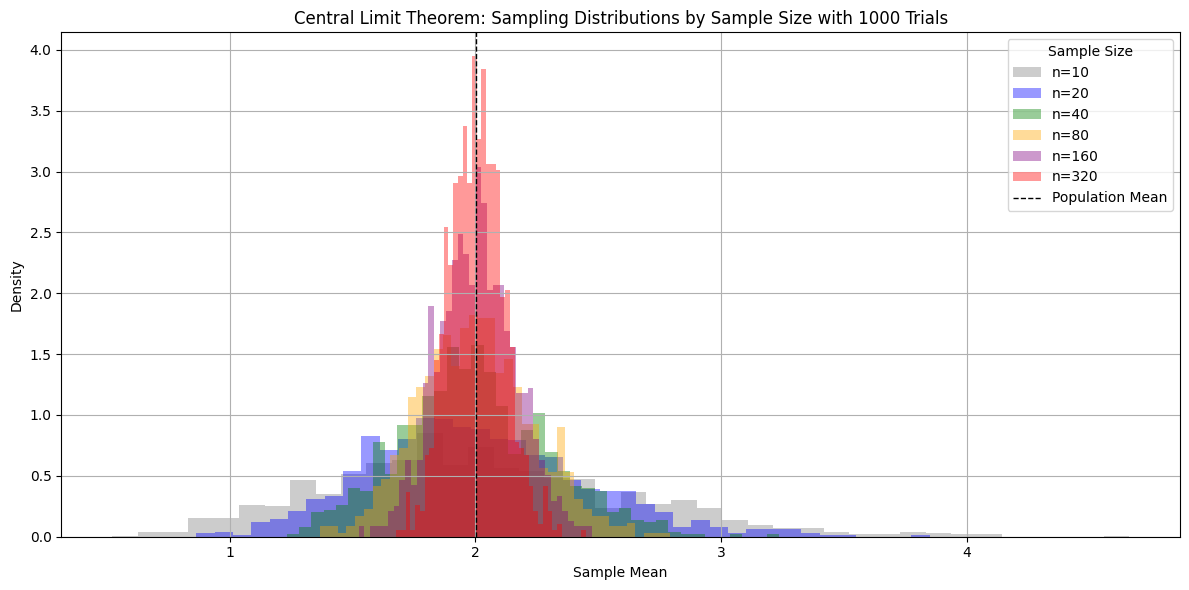

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Settings
population_size = 100000
sample_sizes = [10, 20, 40, 80, 160, 320]
num_trials = 1000

# Step 1: Generate a non-normal population (Exponential distribution)
population = np.random.exponential(scale=2.0, size=population_size)

# Step 2: Calculate population statistics
pop_mean = np.mean(population)
pop_std = np.std(population)
print(f"Population Mean: {pop_mean:.2f}")
print(f"Population Std Dev: {pop_std:.2f}\n")

# Step 3: Prepare figure
plt.figure(figsize=(12, 6))

# Step 4: For each sample size, compute sampling distribution and overlay hist
colors = ['gray', 'blue', 'green', 'orange', 'purple', 'red']
for i, sample_size in enumerate(sample_sizes):
    sample_means = []
    for _ in range(num_trials):
        sample = np.random.choice(population, size=sample_size, replace=False)
        sample_means.append(np.mean(sample))

    # Compute stats
    sampling_mean = np.mean(sample_means)
    sampling_std = np.std(sample_means)
    theoretical_se = pop_std / np.sqrt(sample_size)

    # Print summary
    print(f"Sample Size: {sample_size}")
    print(f"  Mean of Sample Means: {sampling_mean:.2f}")
    print(f"  Std Dev of Sample Means: {sampling_std:.2f}")
    print(f"  Standard Error (Theory): {theoretical_se:.2f}\n")

    # Overlay histogram
    plt.hist(sample_means, bins=40, density=True, alpha=0.4, label=f'n={sample_size}', color=colors[i])

# Mark population mean
plt.axvline(pop_mean, color='black', linestyle='dashed', linewidth=1, label='Population Mean')

plt.title("Central Limit Theorem: Sampling Distributions by Sample Size with 1000 Trials")
plt.xlabel("Sample Mean")
plt.ylabel("Density")
plt.legend(title="Sample Size")
plt.grid(True)
plt.tight_layout()
plt.show()


Population Mean: 2.00
Population Std Dev: 1.99

Number of Samples: 10
  Mean of Sample Means: 2.00
  Std Dev of Sample Means: 0.14
  Standard Error (Theory): 0.20

Number of Samples: 20
  Mean of Sample Means: 2.07
  Std Dev of Sample Means: 0.18
  Standard Error (Theory): 0.20

Number of Samples: 40
  Mean of Sample Means: 1.96
  Std Dev of Sample Means: 0.21
  Standard Error (Theory): 0.20

Number of Samples: 80
  Mean of Sample Means: 1.98
  Std Dev of Sample Means: 0.21
  Standard Error (Theory): 0.20

Number of Samples: 160
  Mean of Sample Means: 2.00
  Std Dev of Sample Means: 0.18
  Standard Error (Theory): 0.20

Number of Samples: 320
  Mean of Sample Means: 2.01
  Std Dev of Sample Means: 0.20
  Standard Error (Theory): 0.20

Number of Samples: 1280
  Mean of Sample Means: 2.00
  Std Dev of Sample Means: 0.20
  Standard Error (Theory): 0.20



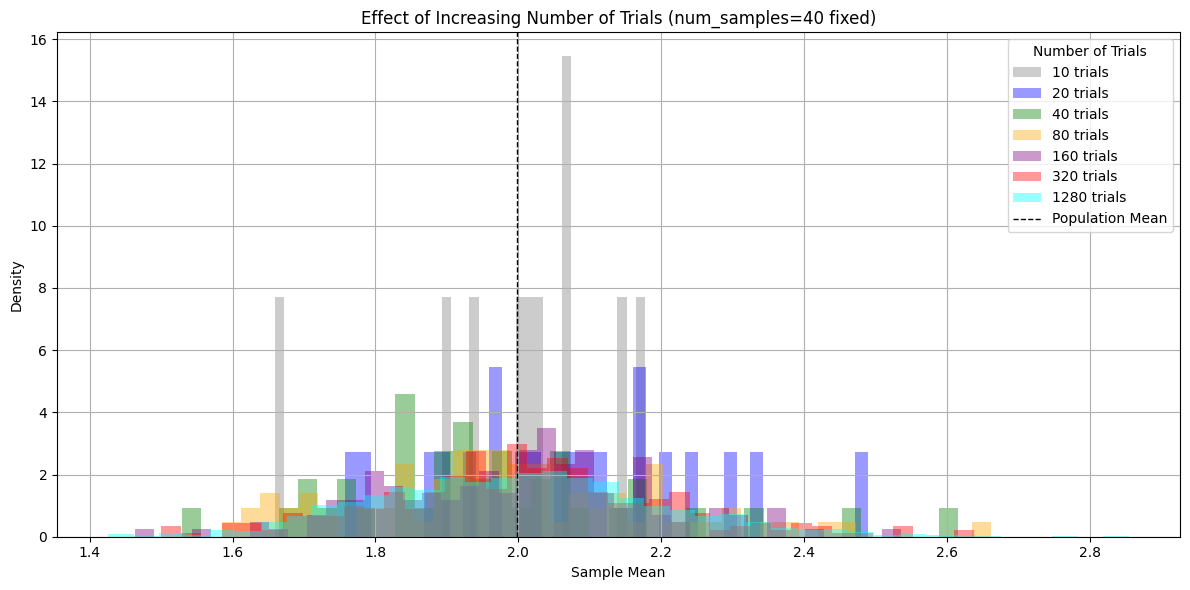

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Settings
population_size = 100000
sample_size = 100
num_trials_list = [10, 20, 40, 80, 160, 320, 1280]

# Step 1: Generate a non-normal population (Exponential distribution)
population = np.random.exponential(scale=2.0, size=population_size)

# Step 2: Calculate population statistics
pop_mean = np.mean(population)
pop_std = np.std(population)
print(f"Population Mean: {pop_mean:.2f}")
print(f"Population Std Dev: {pop_std:.2f}\n")

# Step 3: Prepare plot
plt.figure(figsize=(12, 6))
colors = ['gray', 'blue', 'green', 'orange', 'purple', 'red', 'cyan']

# Step 4: For each number of samples, compute sample means
for i, num_trials in enumerate(num_trials_list):
    sample_means = []
    for _ in range(num_trials):
        sample = np.random.choice(population, size=sample_size, replace=False)
        sample_means.append(np.mean(sample))

    # Compute stats
    sampling_mean = np.mean(sample_means)
    sampling_std = np.std(sample_means)
    theoretical_se = pop_std / np.sqrt(sample_size)

    print(f"Number of Samples: {num_trials}")
    print(f"  Mean of Sample Means: {sampling_mean:.2f}")
    print(f"  Std Dev of Sample Means: {sampling_std:.2f}")
    print(f"  Standard Error (Theory): {theoretical_se:.2f}\n")

    # Overlay histogram
    plt.hist(sample_means, bins=40, density=True, alpha=0.4,
             label=f'{num_trials} trials', color=colors[i])

# Mark population mean
plt.axvline(pop_mean, color='black', linestyle='dashed', linewidth=1, label='Population Mean')

plt.title("Effect of Increasing Number of Trials (num_samples=40 fixed)")
plt.xlabel("Sample Mean")
plt.ylabel("Density")
plt.legend(title="Number of Trials")
plt.grid(True)
plt.tight_layout()
plt.show()
